<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter18/Drawing_bounding_boxes_around_words_in_an_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/3jkwy16m6xdlktb/18_5.JPG

--2020-10-01 13:45:17--  https://www.dropbox.com/s/3jkwy16m6xdlktb/18_5.JPG
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3jkwy16m6xdlktb/18_5.JPG [following]
--2020-10-01 13:45:18--  https://www.dropbox.com/s/raw/3jkwy16m6xdlktb/18_5.JPG
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaca24a0745dd08e80d46471222.dl.dropboxusercontent.com/cd/0/inline/BAfPJIRSTGNazE2BaYM9W9ojpU9PZdjTqltWWkjF5d-PVpqWBkGq84_vCELuaiowX76DU38V1gwm1UrKdl1LEslxYbevvSwhqHJhLy2rNC5QjGnGK2Kv250Vtfw3p8LThU0/file# [following]
--2020-10-01 13:45:18--  https://ucaca24a0745dd08e80d46471222.dl.dropboxusercontent.com/cd/0/inline/BAfPJIRSTGNazE2BaYM9W9ojpU9PZdjTqltWWkjF5d-PVpqWBkGq84_vCELuaiowX76DU38V1gwm1UrKdl1LEslxYbevvSwhqHJhLy2rNC5QjGnGK2Kv250Vtfw3p8

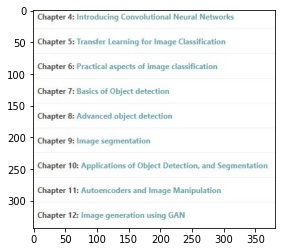

In [ ]:
import cv2, numpy as np
img = cv2.imread('18_5.JPG')
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
import matplotlib.pyplot as plt,cv2
%matplotlib inline
plt.imshow(img1)

In [ ]:
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

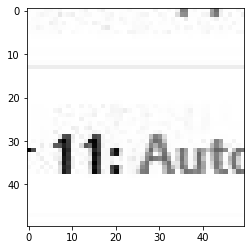

In [ ]:
crop = img_gray[250:300,50:100]
plt.imshow(crop,cmap='gray')

In [ ]:
_img_gray = np.uint8(img_gray < 200)*255

In [ ]:
contours,hierarchy = cv2.findContours(_img_gray,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
thresh1 = np.stack([_img_gray]*3,axis=2)

In [ ]:
thresh2 = np.zeros((thresh1.shape[0],thresh1.shape[1]))

In [ ]:
for cnt in contours:
    if cv2.contourArea(cnt)>0:
        [x,y,w,h] = cv2.boundingRect(cnt)
        if ((h>5) & (h<100)):
            thresh2[y:(y+h),x:(x+w)] = thresh1[y:(y+h),x:(x+w),0].copy()
            cv2.rectangle(thresh1,(x,y),(x+w,y+h),(255,0,0),2)

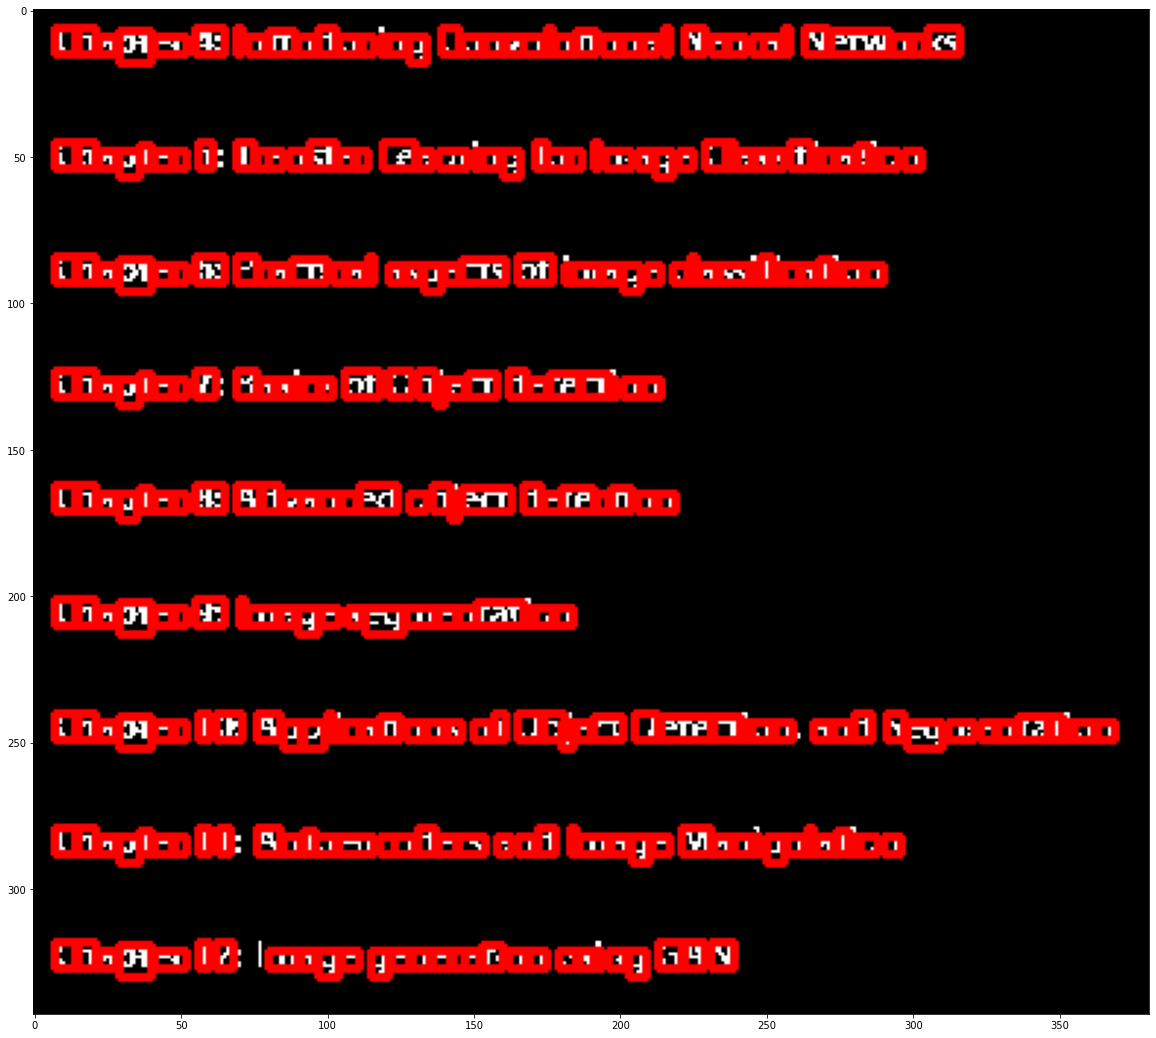

In [ ]:
fig = plt.figure()
fig.set_size_inches(20,20)
plt.imshow(thresh1)

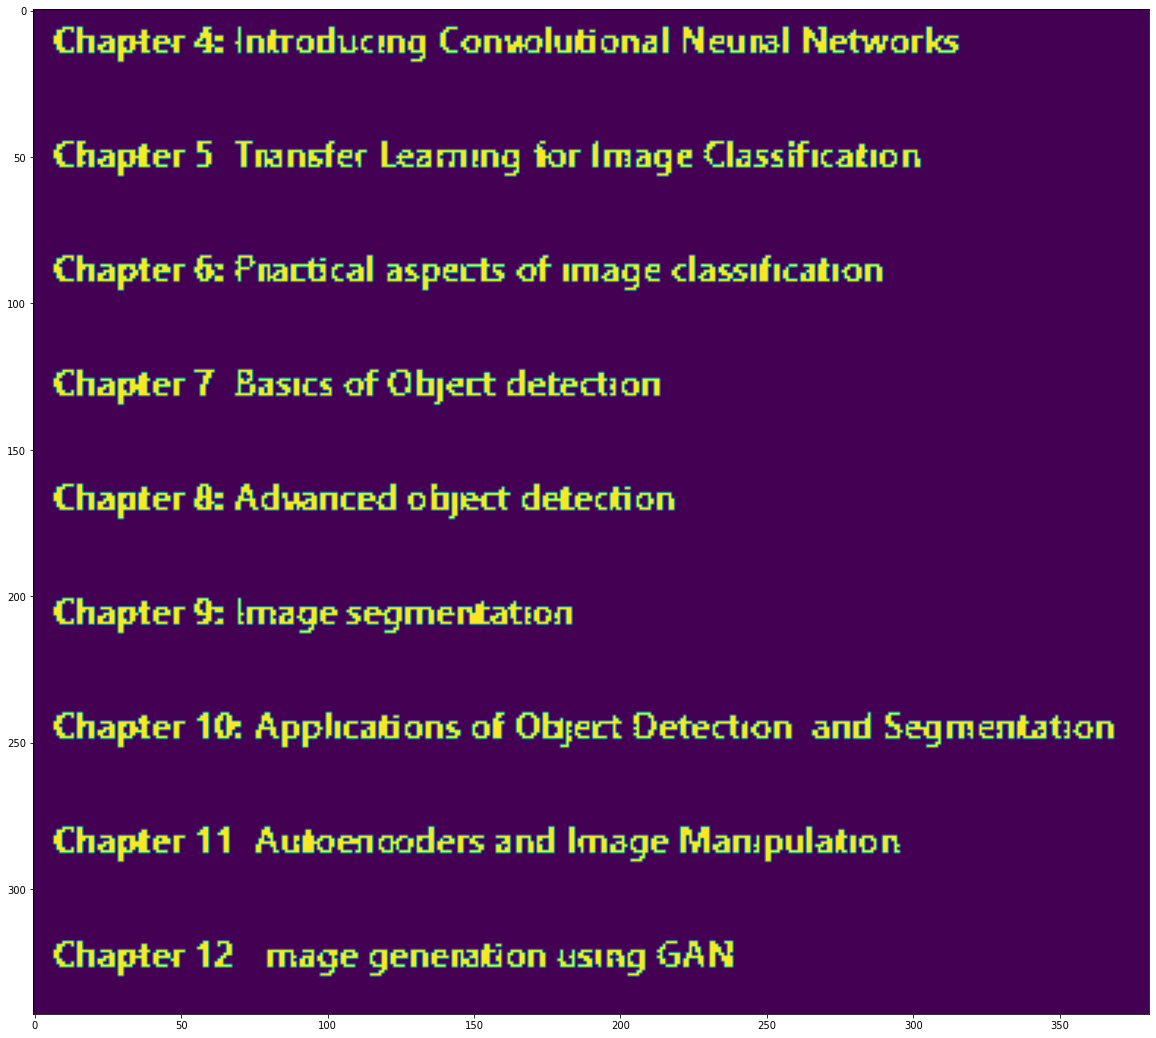

In [ ]:
fig = plt.figure()
fig.set_size_inches(20,20)
plt.imshow(thresh2)

In [ ]:
dilated = cv2.dilate(thresh2, np.ones((1,2),np.uint8), iterations=1)

In [ ]:
contours,hierarchy = cv2.findContours(np.uint8(dilated),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
for cnt in contours:
    if cv2.contourArea(cnt)>5:
        [x,y,w,h] = cv2.boundingRect(cnt)
        if ((h>5) & (h<100)):
            cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)

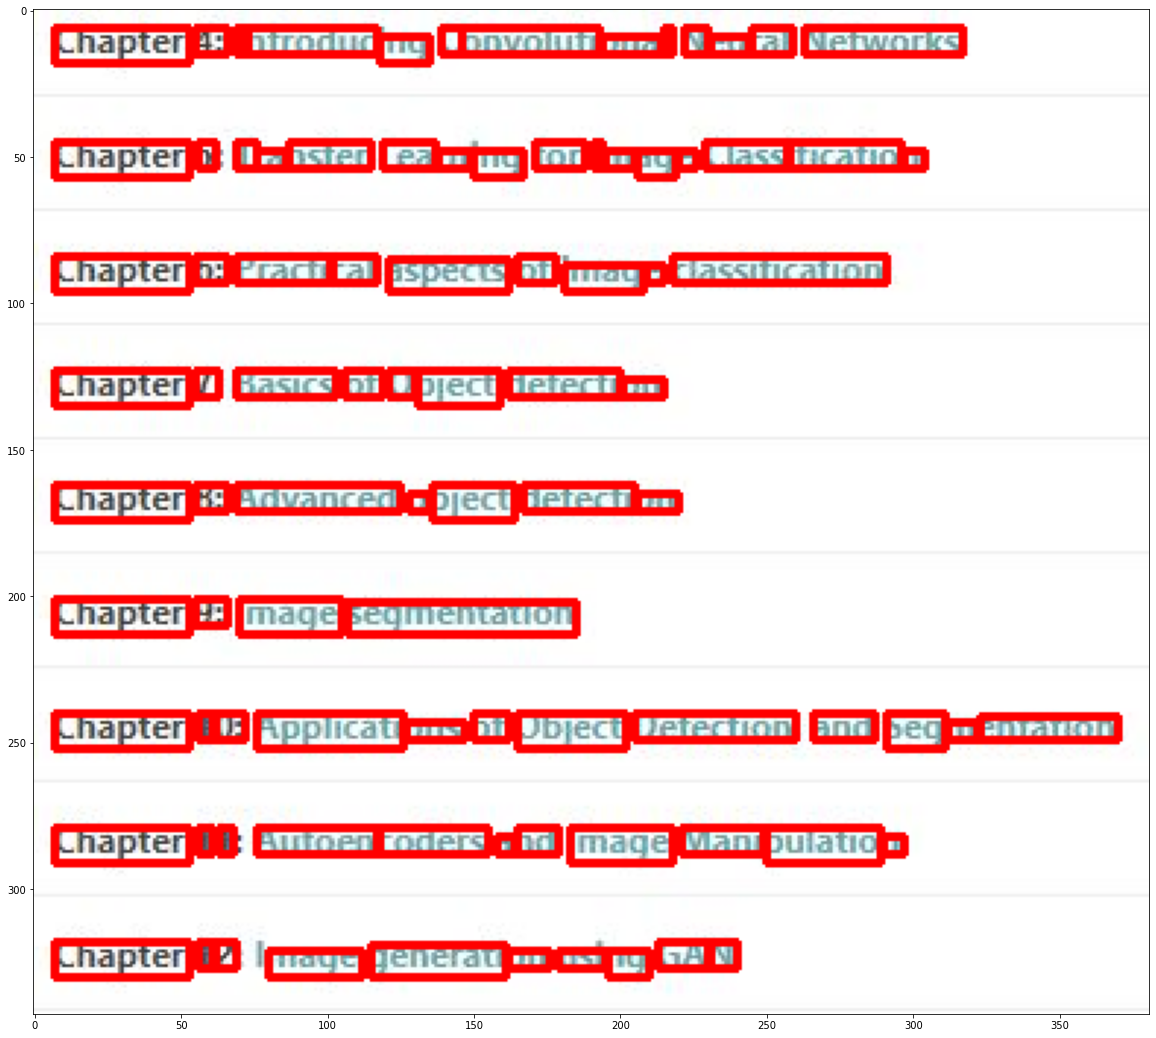

In [ ]:
fig = plt.figure()
fig.set_size_inches(20,20)
plt.imshow(img1)